<a href="https://colab.research.google.com/github/Marcosias0400/Optimizacion/blob/main/Optimizacion_grad1D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problema: \\
EL precio de un sistema de energía solar es dado por: \\
U=35A+108V \\
donde A es la superficie del colector y V es el volumen de la bateria que almacena la energía. Debido a consideraciones de balance de energía, se puede considerar que: \\
A(290-100/V)=5833.3 \\
Adicionalmente el volúmen de la batería V está relacionado a la temperatura de operación del sistema T. y esta configurado tal que: \\
V=50/(T-20) \\
Los proveedores de batería únicamente proveen modelos que trabajan entre 40 y 90 grados. Se desea optimizar el costo U considerando las limitaciones presentadas.

Solucion: \\
Juntando todas las expresiones y expresando en términos de T tenemos la siguiente ecuación: \\
U=204615.5/(330-2T) + 10400/(T-20)

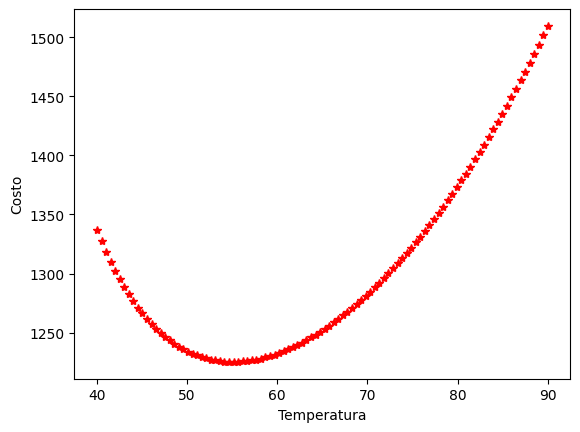

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
a=40
b=90
T=np.linspace(a,b,100)
U=204165.5/(330-2*T) + 10400/(T-20)
plt.figure()
plt.plot(T,U,'*r')
plt.xlabel('Temperatura')
plt.ylabel('Costo')
plt.show()

Métodos Basados en gradiente \\
Puesto que en estos se nesecita calcular la derivada, se utilizara python para derivar la siguiente ecuación: \\
U=204165.5/(330-2T) + 10400/(T-20) \\
Entonces la primera y la segunda derivada se puede calcular de la siguiente manera:

In [22]:
import sympy as sy
import numpy as np
def calcularGradiente():
  T=sy.Symbol('T')
  fu=204165.5/(330-2*T) + 10400/(T-20)
  d1fu=sy.diff(fu)
  print(fu)
  print(d1fu)
  return None
calcularGradiente()

10400/(T - 20) + 204165.5/(330 - 2*T)
-10400/(T - 20)**2 + 408331.0/(330 - 2*T)**2


In [4]:
def U(T):
  return 204165.5/(330-2*T) + 10400/(T-20)
U(55.08)

1225.1656408350887

In [2]:
def d1U(T):
  return -10400/(T - 20)**2 + 408331.0/(330 - 2*T)**2
d1U(55.08)

-0.0022423688924249063

Algoritmo de la bisección:

paso1.- Definir a,b,c

paso2.- Calcular c=(a+b)/2, f'(a), f'(c)

    si f'(a)*f'(c)<0

        entonces b=c

        de otra manera a=c

    si |a-b|>tol

        entonces retorna al pas2

        de otra manera paso3

paso3.- Imprimir a, f(a)

In [18]:
def biseccion():
  a=40
  b=90
  tol=0.001
  paso=True
  cont=0
  registro=[]
  while(paso):
    c=(a+b)/2
    # Primera derivada en a
    dU_a=d1U(a)
    # Primera derivada en c
    dU_c=d1U(c)
    if dU_a*dU_c<0:
      b=c
    else:
      a=c
    # Condicion de finalizacion
    if abs(b-a)<tol:
      print('=======================================================')
      paso=False
    cont+=1
    registro.append([cont,a,U(a)])
  return registro
reg1=biseccion()
for k in reg1:
  print('It {:02} -- Temp: {:.10f} -- Costo {:.10f}'.format(k[0],k[1],k[2]))

It 01 -- Temp: 40.0000000000 -- Costo 1336.6620000000
It 02 -- Temp: 52.5000000000 -- Costo 1227.4022222222
It 03 -- Temp: 52.5000000000 -- Costo 1227.4022222222
It 04 -- Temp: 52.5000000000 -- Costo 1227.4022222222
It 05 -- Temp: 54.0625000000 -- Costo 1225.5036361287
It 06 -- Temp: 54.8437500000 -- Costo 1225.1839888051
It 07 -- Temp: 54.8437500000 -- Costo 1225.1839888051
It 08 -- Temp: 55.0390625000 -- Costo 1225.1662656061
It 09 -- Temp: 55.0390625000 -- Costo 1225.1662656061
It 10 -- Temp: 55.0390625000 -- Costo 1225.1662656061
It 11 -- Temp: 55.0634765625 -- Costo 1225.1657646744
It 12 -- Temp: 55.0756835938 -- Costo 1225.1656564351
It 13 -- Temp: 55.0817871094 -- Costo 1225.1656378426
It 14 -- Temp: 55.0817871094 -- Costo 1225.1656378426
It 15 -- Temp: 55.0833129883 -- Costo 1225.1656368938
It 16 -- Temp: 55.0833129883 -- Costo 1225.1656368938


Evaluacion del método

Vamos a graficar el proceso de evolucion que el algoritmo para encontrar el mínimo

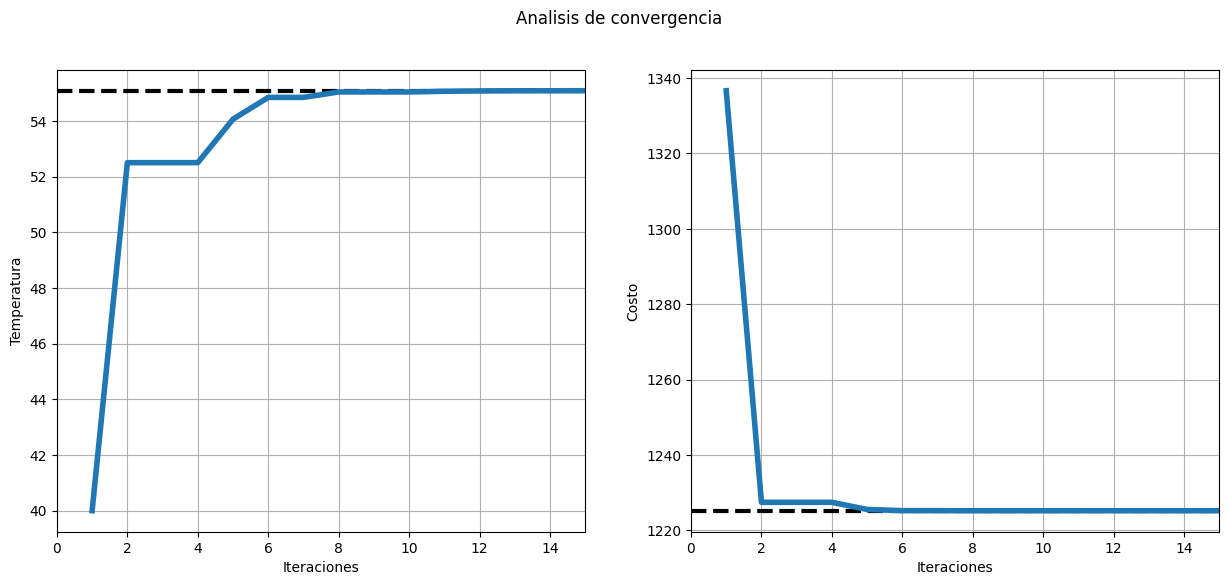

In [28]:
import matplotlib.pyplot as plt
def evaluacion(reg):
  reg=np.array(reg)
  fig,axs=plt.subplots(1,2,figsize=(15,6))
  fig.suptitle('Analisis de convergencia')
  axs[0].axhline(55.08, color='k',linewidth=3,linestyle='--')
  axs[0].plot(reg[:,0],reg[:,1],linewidth=4)
  axs[0].set_xlabel('Iteraciones')
  axs[0].set_ylabel('Temperatura')
  axs[0].grid()
  axs[0].set_xlim([0,15])
  axs[1].axhline(1225.17, color='k',linewidth=3,linestyle='--')
  axs[1].plot(reg[:,0],reg[:,2],linewidth=4)
  axs[1].set_xlabel('Iteraciones')
  axs[1].set_ylabel('Costo')
  axs[1].grid()
  axs[1].set_xlim([0,15])
  plt.show()
evaluacion(reg1)